In [4]:
import numpy
import flowx
import simulation
flowx.__version__

'0.1.dev'

In [6]:

# Define grid parameters
nx, ny = 40, 40
xmin, xmax = 0.0, 1.0
ymin, ymax = 0.0, 1.0

# Define cell-centered variable names
center_vars = ['asol', 'ivar', 'rvar', 'eror']

# Define boundary condition for the poisson test
user_bc = 'dirichlet'

# Define boundary conditions for variable ivar
bc_type = {'ivar': [user_bc, user_bc, user_bc, user_bc]}
bc_val  = {'ivar': [0.0, 0.0, 0.0, 0.0]}

# Create the grid and data
grid = flowx.Grid('cell-centered', center_vars,
                    nx, ny, xmin, xmax, ymin, ymax,
                    user_bc_type=bc_type, user_bc_val=bc_val)

In [9]:
# Compute the analytical solution 
simulation.get_analytical(grid, 'asol', user_bc)

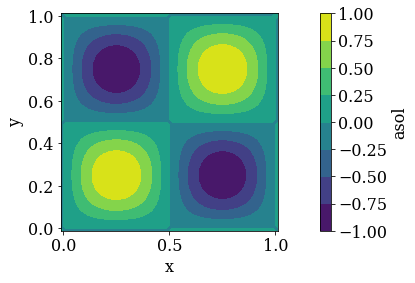

In [10]:
# Plot the analytical solution
flowx.io.plot_contour(grid, 'asol')

In [11]:
# Calculate the right-hand side of the Poisson system
simulation.get_rhs(grid, 'rvar', user_bc)

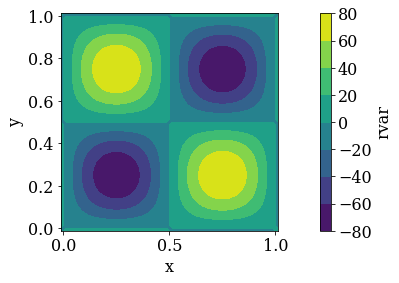

In [12]:
# Plot the right-hand side of the Poisson system
flowx.io.plot_contour(grid, 'rvar')

In [14]:
N = 100

main = numpy.zeros(N)          # diagonal
lower = numpy.zeros(N-1)       # subdiagonal
upper = numpy.zeros(N-1)       # superdiagonal
lower2 = numpy.zeros(N-(nx+1)) # lower diagonal
upper2 = numpy.zeros(N-(nx+1)) # upper diagonal



# Filling the diagonal

we run through all mesh points and fill in elements on the various diagonals. The line of mesh points corresponding to j = 0  are all on the boundary, and only the main diagonal gets a contribution:


In [16]:
m = lambda i, j:j*(nx+1) +i
j =0 ; main[m(0,j):m(nx+1,j)] = 1 # j=0 boundary line

we run all interior j = constant lines of mesh points. The first and the last point on each line, i = 0 and i =nx, correspond to boundary points:

In [18]:
for j in range(1,grid.ny+1):
    main[m(0,j)] = 1
    main[m(nx,j)] = 1 # boundary
        

IndexError: index 122 is out of bounds for axis 0 with size 100